In [37]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("air-traffic-passenger-statistics.csv")

In [11]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [17]:
# Kategorik sütunları bulma (örneğin, object türündeki sütunlar)
categorical_columns = df.select_dtypes(include=['object']).columns

# Her bir kategorik sütunu LabelEncoder ile sayısal değerlere çevirme
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Activity Period              18885 non-null  int64
 1   Operating Airline            18885 non-null  int32
 2   Operating Airline IATA Code  18885 non-null  int32
 3   Published Airline            18885 non-null  int32
 4   Published Airline IATA Code  18885 non-null  int32
 5   GEO Summary                  18885 non-null  int32
 6   GEO Region                   18885 non-null  int32
 7   Activity Type Code           18885 non-null  int32
 8   Price Category Code          18885 non-null  int32
 9   Terminal                     18885 non-null  int32
 10  Boarding Area                18885 non-null  int32
 11  Passenger Count              18885 non-null  int64
dtypes: int32(10), int64(2)
memory usage: 1.0 MB


In [21]:
print(df.columns)

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')


In [23]:
x= df[['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area']]
y= df[['Passenger Count']]

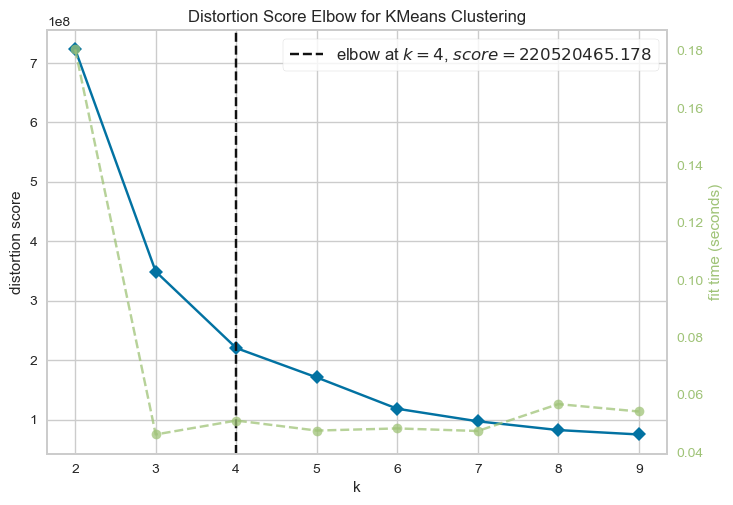

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# en optimum nokta için
km= KMeans()
vis =KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [27]:
model =KMeans(4)

In [29]:
model = model.fit(x)

In [31]:
pred = model.predict(x)

In [33]:
x["passeng"]= pred

In [39]:
silhouette_score(x,pred)

0.5160563660501487

In [45]:
x["passeng"].value_counts()

passeng
3    5564
2    4906
0    4249
1    4166
Name: count, dtype: int64

In [47]:
# gruplarından merkezinden olan uzaklıkları kullanmak için wcss
wcss=[]
ss =[]
for i in range(2,10):
    model=KMeans(i)
    model = model.fit(x)
    pred = model.predict(x)
    ss1 = silhouette_score(x,pred)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.6076255196347298
0.5594571996893614
0.5285017394934982
0.5021200429222598
0.4726827910936044
0.4541698616201327
0.44354860304369914
0.42772660460340733
